<a href="https://colab.research.google.com/github/fweberling/Gaussian_Processes/blob/master/Motivating_Gaussian_Processes_as_Stochastic_Processes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is work in progress

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from numpy.linalg import inv
import seaborn as sns

# Covariance Functions

Squared exponential 

\begin{equation}
k\left(x_p, x_q \right) = \sigma_f^2 \mathrm{exp}\left(- \frac{1}{2l^2} \left(x_p - x_q\right)^2 \right)
\end{equation}

In [2]:
# Squared exponential covariance function (kernel)

def squared_exponential(X_p, X_q, sigma_f = 1.0, l = 1.0, visualize = False):
    """"
    Squared-exponential covariance function calculating the covariance matrix
    
    X_p is (m x n) matrix
    """

    squared_dist = np.sum(X_p**2, 1).reshape(-1, 1) - 2 * X_p @ X_q.T + np.sum(X_q**2, 1)

    covariance_matrix = sigma_f**2 * np.exp(-1/(2 * l**2) * squared_dist)

    if visualize == True:
      sns.heatmap(covariance_matrix)
    
    return covariance_matrix

Brownian motion

\begin{equation}
k \left(x_p, x_q \right) = \mathrm{min}\left(x_p, x_q\right)
\end{equation}

In [3]:
# Brownian motion

def brownian_motion(X_p, X_q, visualize = False):
  """
  Brownian motion
  """
  covariance_matrix = np.minimum(X_p,X_q.T)

  if visualize == True:
      sns.heatmap(covariance_matrix)

  return covariance_matrix

Neural Network


\begin{equation}
k \left(\pmb{x}, \pmb{x}' \right) = \frac{2}{\pi}\mathrm{sin}^{-1}\left( \frac{2 \widetilde{\pmb{x}}^T \pmb{\Sigma}\widetilde{\pmb{x}}'}{ \sqrt{\left(1 + \widetilde{\pmb{x}}^T \pmb{\Sigma}\widetilde{\pmb{x}} \right)\left(1 + \widetilde{\pmb{x}}'^T \pmb{\Sigma}\widetilde{\pmb{x}}'\right)}}  \right)
\end{equation}

with $\widetilde{\pmb{x}} = \left[1, x_1, ... , x_n \right]^T$

In [4]:
# To Do neural network kernel

def neural_network(X_p, X_q, weight_prior):

  return covariance_matrix

# Stochastic Process

In [5]:
def stochastic_process(mean_function, covariance_function, num_samples, dim_sample):
  """
  Stochastic process with Gaussian finite dimensional distributions
  """

  X_test = np.linspace(0, 4 * np.pi, dim_sample).reshape(dim_sample,1)

  covariance_matrix = covariance_function(X_test, X_test)
  mean = mean_function

  num_func = 2
  samples = np.random.multivariate_normal(mean, covariance_matrix,1).reshape(X_test.size,1)

  if num_samples > 1:
      for func in range(1, num_func):
          sample = np.random.multivariate_normal(mean, covariance_matrix,1).reshape(X_test.size,1)
          samples = np.hstack((samples, sample))

  # Plotting samples
  fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
  ax.plot(np.arange(0, dim_sample, 1), samples,'-x', label = 'sample')
  ax.legend(loc = 'lower left')
  plt.title('Samples')
  plt.show()

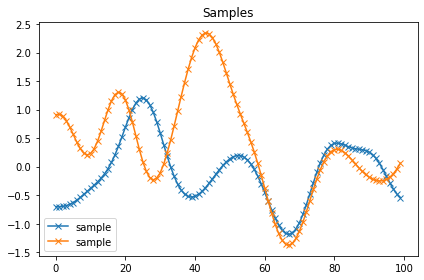

In [6]:
stochastic_process(np.zeros(100), squared_exponential, 2, 100)

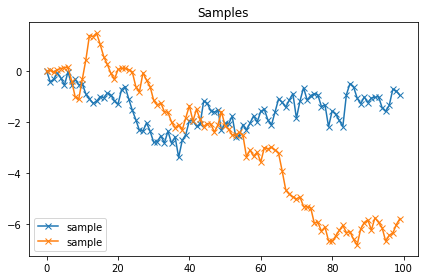

In [7]:
stochastic_process(np.zeros(100), brownian_motion, 2, 100)